In [1]:
from altair import Chart, load_dataset

### Let's re-create the example from the documentation

In [2]:
cars = load_dataset('cars')

In [3]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


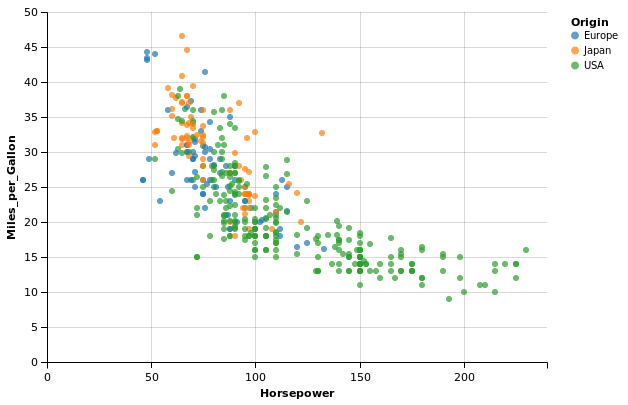

In [4]:
Chart(cars).mark_circle().encode(
    x = 'Horsepower',
    y = 'Miles_per_Gallon',
    color = 'Origin',
)

In [3]:
test_chart = Chart(cars).mark_circle().encode(
    x = 'Horsepower',
    y = 'Miles_per_Gallon',
    color = 'Origin',
)

### A look at the Vega-lite JSON behind this plot

In [6]:
print(test_chart.to_json(indent=2))

{
  "data": {
    "values": [
      {
        "Acceleration": 12.0,
        "Cylinders": 8,
        "Displacement": 307.0,
        "Horsepower": 130.0,
        "Miles_per_Gallon": 18.0,
        "Name": "chevrolet chevelle malibu",
        "Origin": "USA",
        "Weight_in_lbs": 3504,
        "Year": "1970-01-01"
      },
      {
        "Acceleration": 11.5,
        "Cylinders": 8,
        "Displacement": 350.0,
        "Horsepower": 165.0,
        "Miles_per_Gallon": 15.0,
        "Name": "buick skylark 320",
        "Origin": "USA",
        "Weight_in_lbs": 3693,
        "Year": "1970-01-01"
      },
      {
        "Acceleration": 11.0,
        "Cylinders": 8,
        "Displacement": 318.0,
        "Horsepower": 150.0,
        "Miles_per_Gallon": 18.0,
        "Name": "plymouth satellite",
        "Origin": "USA",
        "Weight_in_lbs": 3436,
        "Year": "1970-01-01"
      },
      {
        "Acceleration": 12.0,
        "Cylinders": 8,
        "Displacement": 304.0,
       

### Embed plot into an HTML file

In [7]:
html = test_chart.to_html()

In [8]:
with open('test_chart.html', 'w') as f:
    f.write(html)

In [9]:
from html_template import custom_template, custom_urls

In [10]:
custom_html = test_chart.to_html(template=custom_template,
                                 title="Testing ALTAIR",
                                 d3_js_url=custom_urls["d3js"],
                                 vega_js_url=custom_urls["vega"],
                                 vegalite_js_url=custom_urls["vega-lite"],
                                 vegaembed_js_url=custom_urls["vega-embed"],
                                 fix = {"$schema": "https://vega.github.io/schema/vega-lite/v2.0.json",
                                        "description": "A simple bar chart with embedded data."})

In [11]:
with open('test_chart2.html', 'w') as f:
    f.write(custom_html)

## Let's add plots

In [19]:
from altair import Bin, X, Y

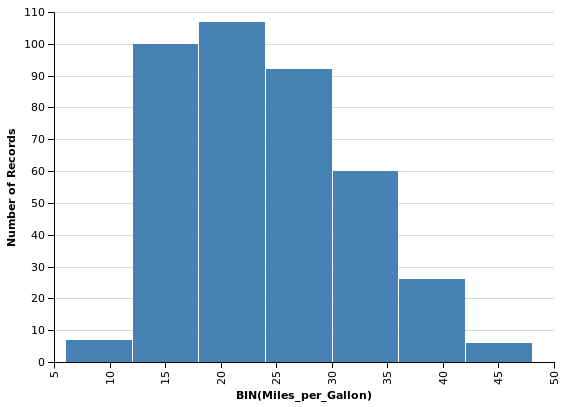

In [28]:
Chart(cars).mark_bar().encode(
               x=X('Miles_per_Gallon', bin=Bin(30)),
               y='count(*):Q'
           )

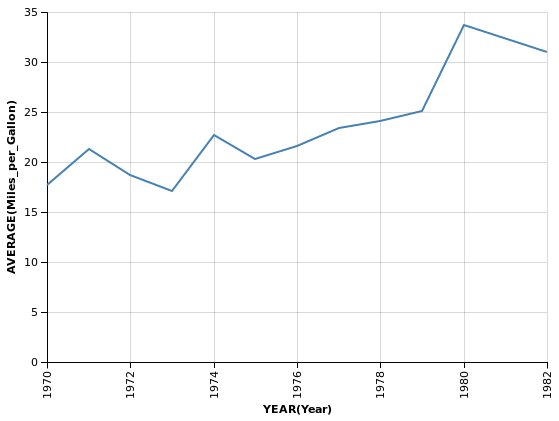

In [27]:
Chart(cars).mark_line().encode(
    X('Year:T', timeUnit='year'),
    Y('average(Miles_per_Gallon)')
)

## Customise the html page

In [4]:
from html_template import custom_template_with_text, custom_urls

In [5]:
repo = """
Check code on <a href="https://github.com/Eleonore9/pyconse17">Github</a>
"""

aim = """
Looking at cars manufactured between 1970 and 1982, what is the repartition and evolution
of the performance in terms of miles driven for one gallon of oil.<br>
Is there a correlation between the car consumption, the horsepower and country of origin?
"""

conclusion = """
The majority of cars in the dataset have a performance less than 30 miles per gallon. 
This correspond to car built until the late 1970's.<br>
There is obviously a correlation with the horsepower. The most efficient oil consumption, 
the lower the horsepower.<br>
Those better performing cars are build all over the world, but primarily in Japan and Europe.<br>
Having a a closer look at the state of the US car manufacturing industry in the 1980's might 
"""

datasources = """
Done using the Vega-Lite <a href="https://github.com/vega/vega-datasets/blob/gh-pages/data/cars.json">'cars' dataset</a>
"""

In [6]:
custom_html_text = test_chart.to_html(template=custom_template_with_text,
                                      title="Exploring cars data with ALTAIR",
                                      d3_js_url=custom_urls["d3js"],
                                      vega_js_url=custom_urls["vega"],
                                      vegalite_js_url=custom_urls["vega-lite"],
                                      vegaembed_js_url=custom_urls["vega-embed"],
                                      fix = {"$schema": "https://vega.github.io/schema/vega-lite/v2.0.json",
                                             "description": "A simple bar chart with embedded data."},
                                      navbar=repo,
                                      paragraph_1=aim,
                                      paragraph_2=conclusion,
                                      references=datasources)

In [7]:
with open('test_chart3.html', 'w') as f:
    f.write(custom_html_text)